In [4]:
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import numpy as np
import random

In [5]:
# 1. Baca gambar menggunakan OpenCV
image_cv2 = cv2.imread('/content/gambarplat.jpeg')

In [6]:
# Baca gambar menggunakan PIL
image_pil = Image.open('/content/gambarplat.jpeg')

Gambar Asli:


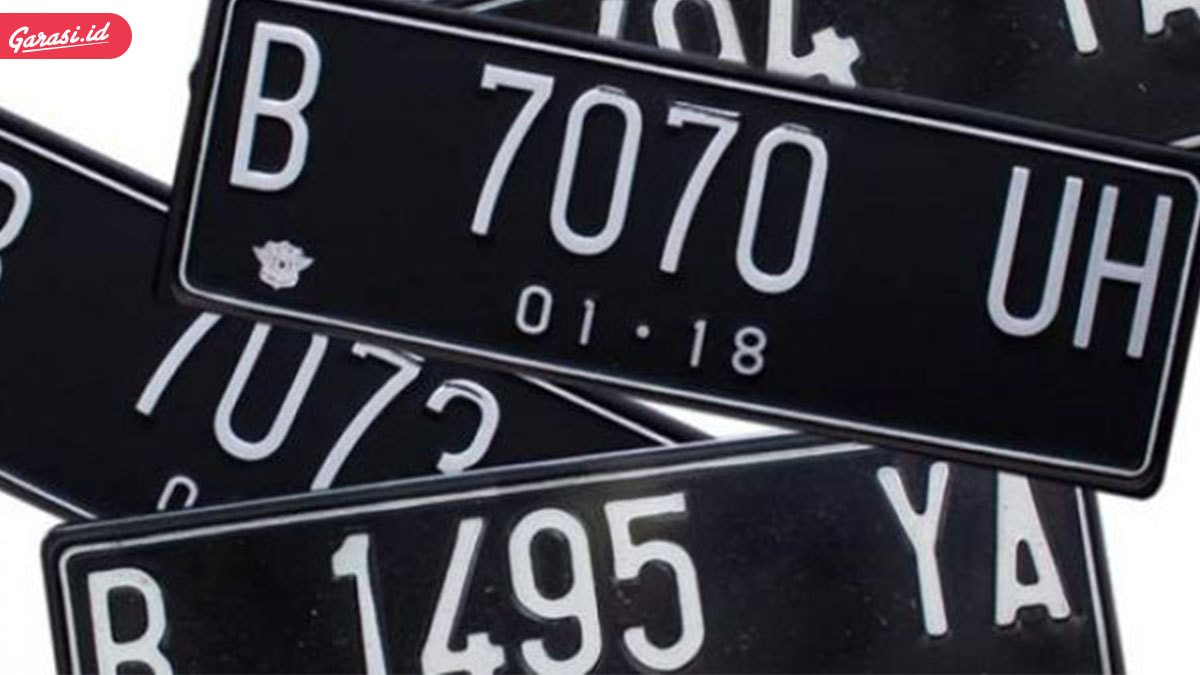

In [7]:
# gambar asli
print("Gambar Asli:")
cv2_imshow(image_cv2)

Hasil edge detection menggunakan Sobel:


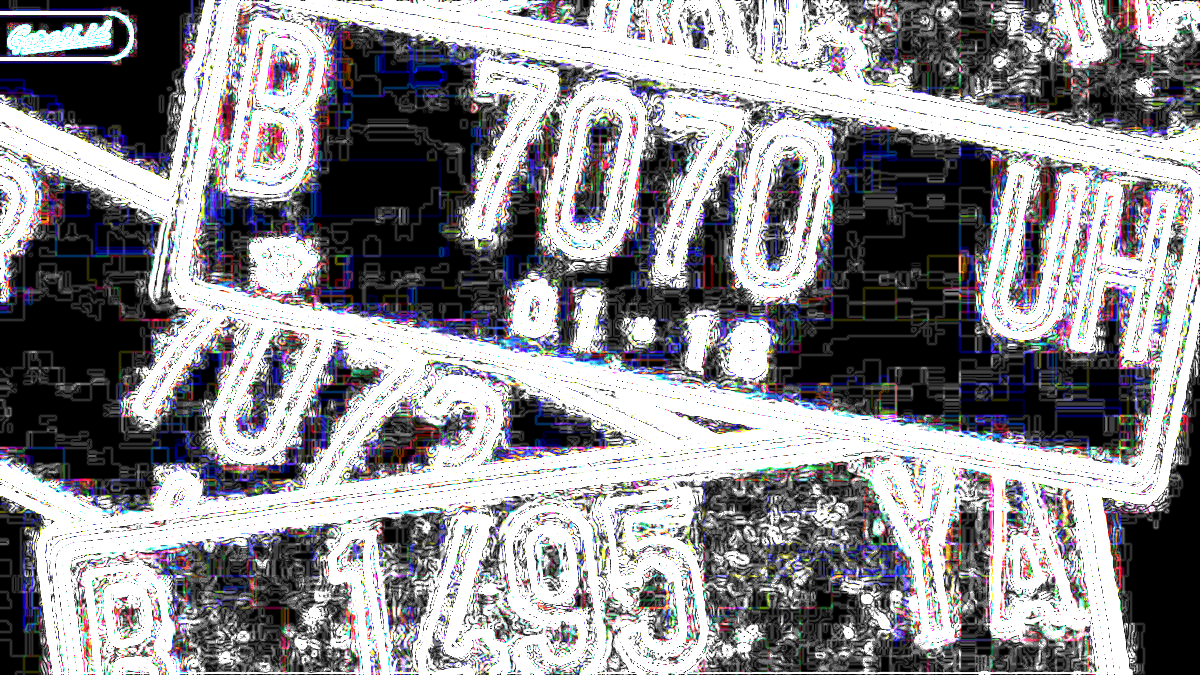

In [8]:
# 2. Lakukan edge detection menggunakan Sobel dan Canny
# Sobel
sobel_x = cv2.Sobel(image_cv2, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image_cv2, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = cv2.bitwise_or(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))

print("Hasil edge detection menggunakan Sobel:")
cv2_imshow(sobel_edges)

Hasil edge detection menggunakan Canny:


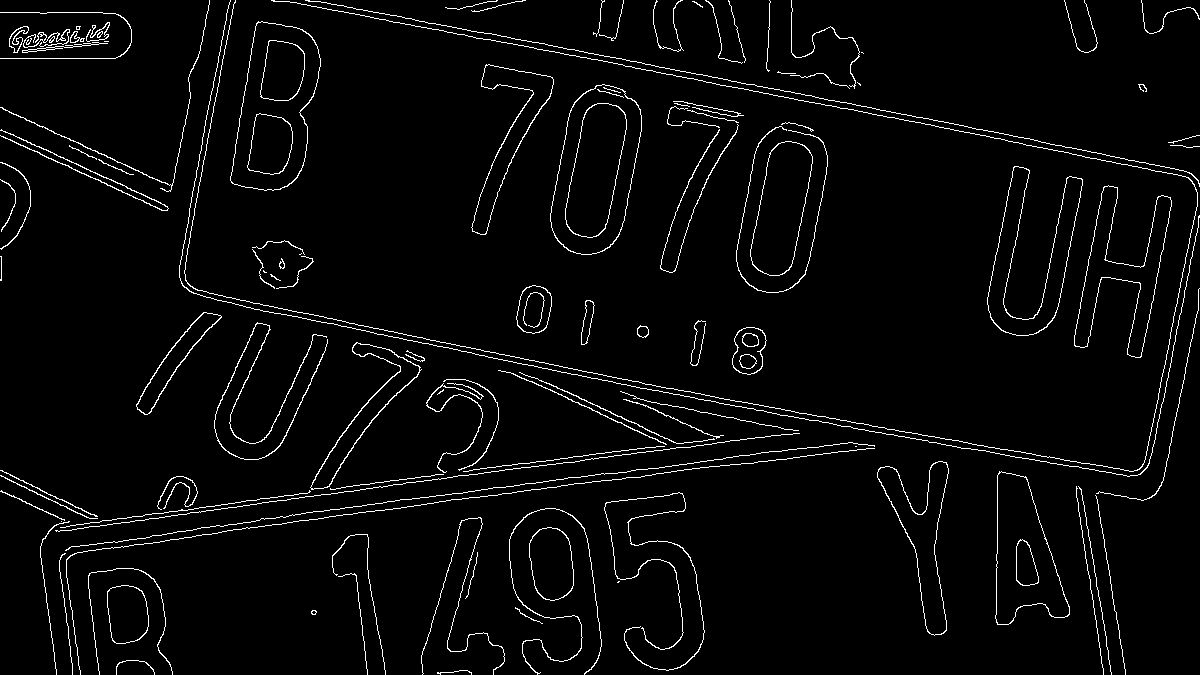

In [9]:
# Canny
canny_edges = cv2.Canny(image_cv2, 100, 200)

print("Hasil edge detection menggunakan Canny:")
cv2_imshow(canny_edges)

Hasil random cropping:


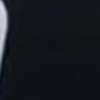

In [10]:
# 3. Lakukan cropping: random cropping dan half-size center cropping
# Random cropping
h, w = image_cv2.shape[:2]
random_x = random.randint(0, w - 100)
random_y = random.randint(0, h - 100)
random_cropped = image_cv2[random_y:random_y+100, random_x:random_x+100]

print("Hasil random cropping:")
cv2_imshow(random_cropped)

Hasil half-size center cropping:


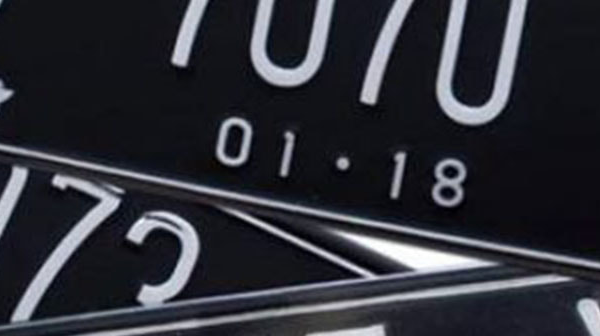

In [11]:
# Half-size center cropping
center_cropped = image_cv2[h//4:h//4*3, w//4:w//4*3]

print("Hasil half-size center cropping:")
cv2_imshow(center_cropped)

Hasil transformasi warna pada gambar (putih menjadi hitam, hitam menjadi putih):


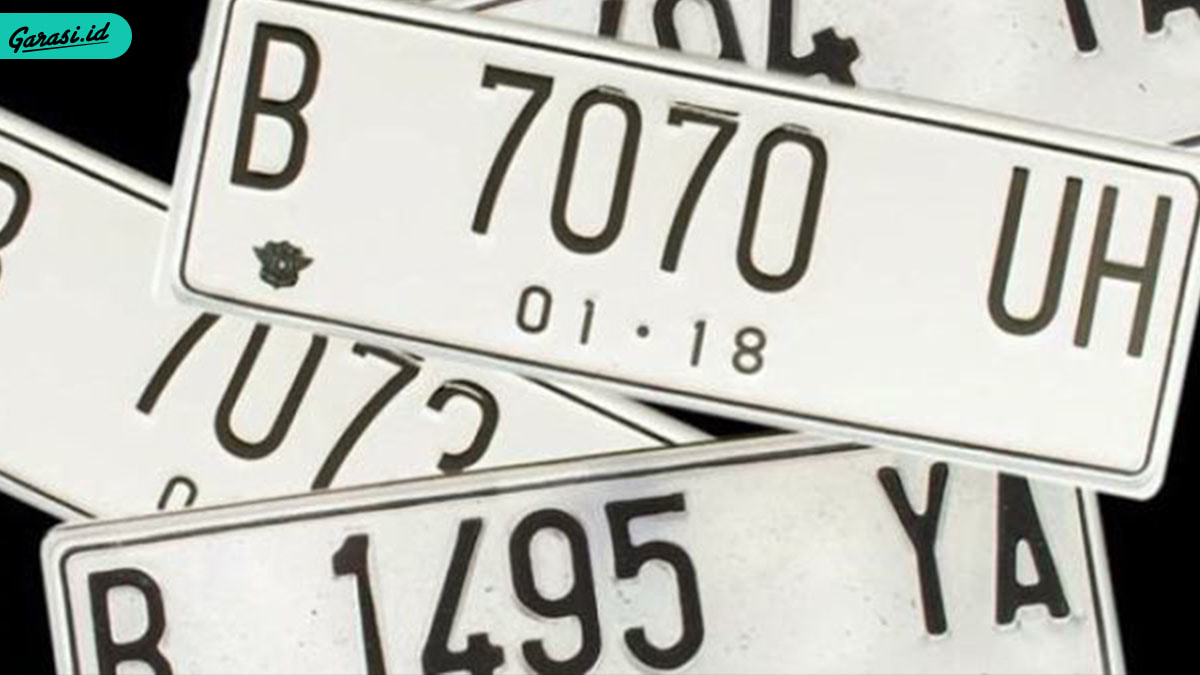

In [12]:
# 4. Lakukan transformasi pada gambar: putih jadi hitam, hitam jadi putih
inverted_image_cv2 = cv2.bitwise_not(image_cv2)

print("Hasil transformasi warna pada gambar (putih menjadi hitam, hitam menjadi putih):")
cv2_imshow(inverted_image_cv2)

Hasil penambahan noise (Salt and Pepper):


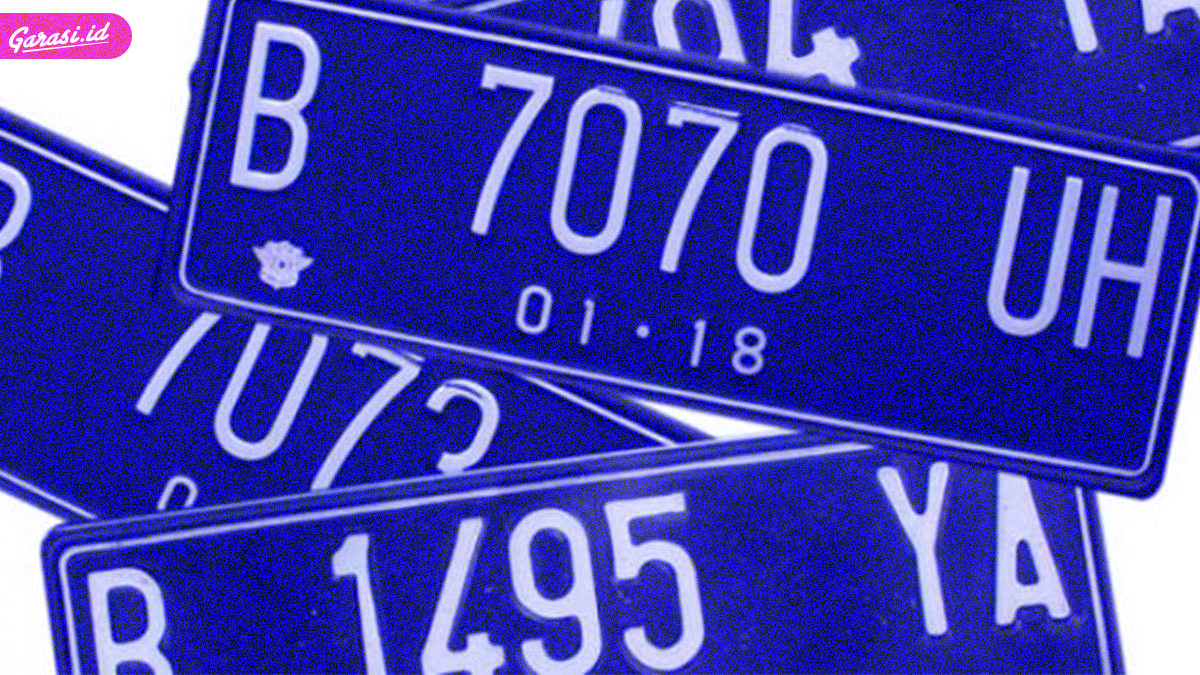

In [13]:
# 5. Tambahkan noise pada gambar original: salt and pepper noise dan gaussian
# Salt and Pepper Noise
salt_pepper_noise = np.zeros(image_cv2.shape, np.uint8)
cv2.randu(salt_pepper_noise, 0, 255)
salt_pepper_noise[salt_pepper_noise < 30] = 0
salt_pepper_noise[salt_pepper_noise > 225] = 255
salt_pepper_noisy_image = cv2.add(image_cv2, salt_pepper_noise)

print("Hasil penambahan noise (Salt and Pepper):")
cv2_imshow(salt_pepper_noisy_image)

Hasil penambahan noise (Gaussian):


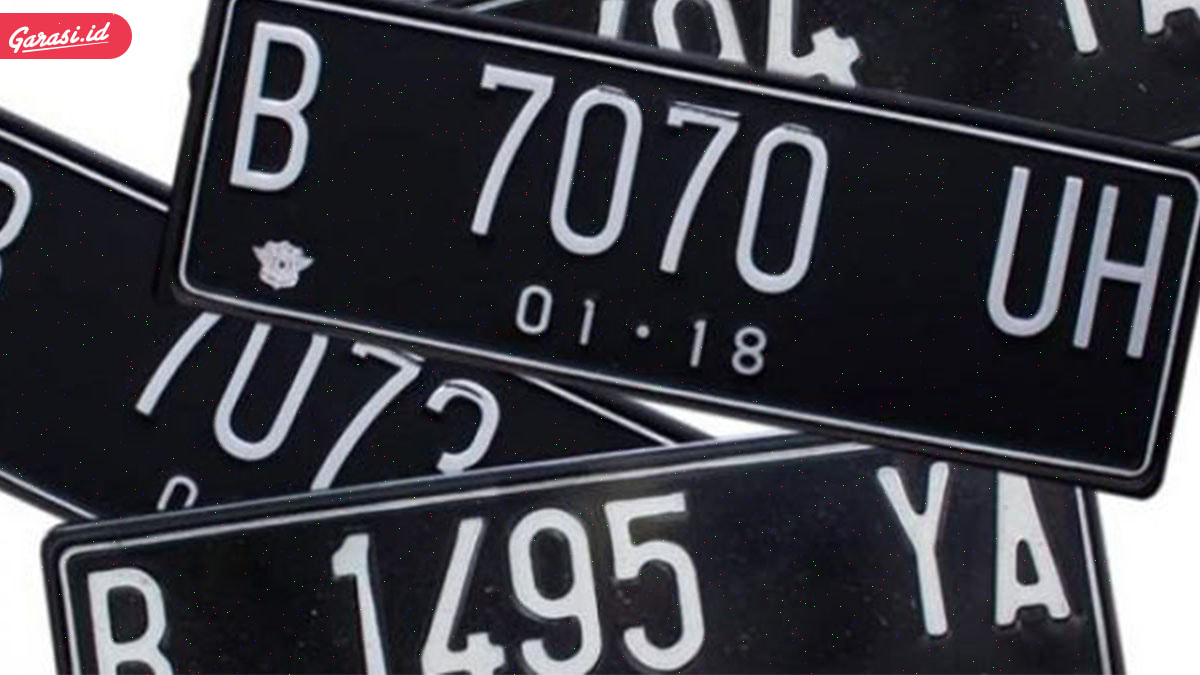

In [14]:
# Gaussian Noise
mean = 0
var = 0.1
sigma = var ** 0.5
gaussian_noise = np.random.normal(mean, sigma, image_cv2.shape)
gaussian_noise = gaussian_noise.reshape(image_cv2.shape).astype('uint8')
gaussian_noisy_image = cv2.add(image_cv2, gaussian_noise)

print("Hasil penambahan noise (Gaussian):")
cv2_imshow(gaussian_noisy_image)

Hasil rotasi gambar:


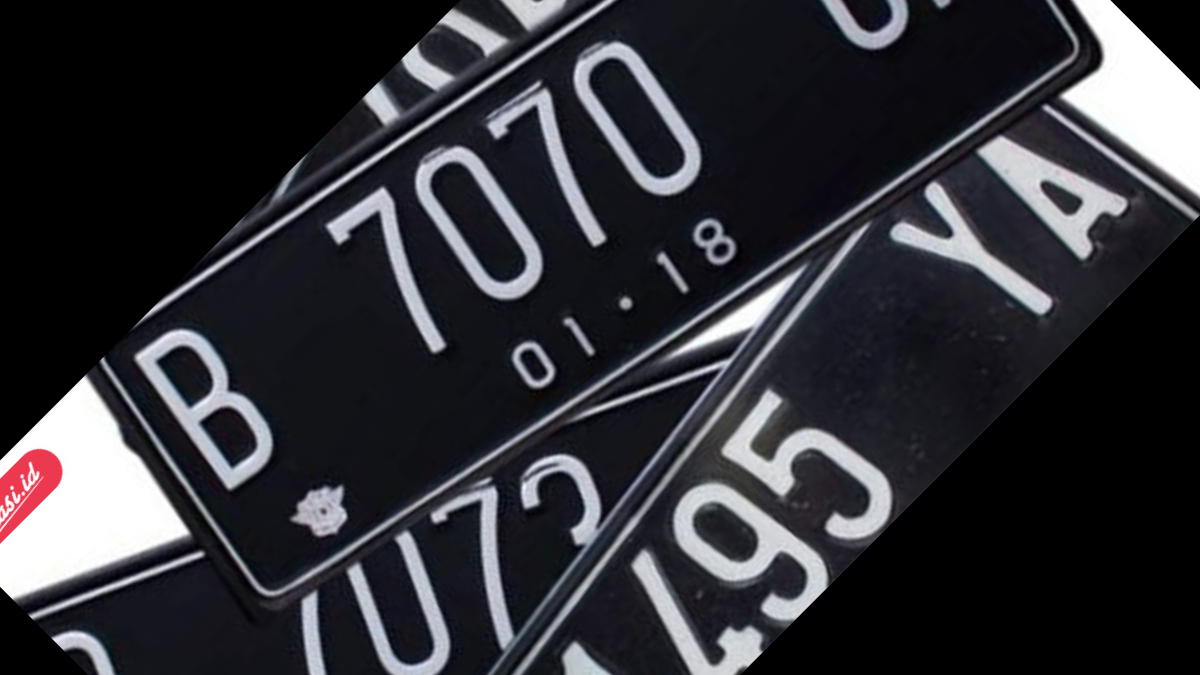

In [15]:
# 6. Lakukan transformasi geometri: rotasi, flip vertikal dan horizontal
# Rotasi
rows, cols = image_cv2.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_image = cv2.warpAffine(image_cv2, rotation_matrix, (cols, rows))

print("Hasil rotasi gambar:")
cv2_imshow(rotated_image)

In [16]:
# Flip Vertikal dan Horizontal
flipped_vertical = cv2.flip(image_cv2, 0)
flipped_horizontal = cv2.flip(image_cv2, 1)

Hasil flip vertikal:


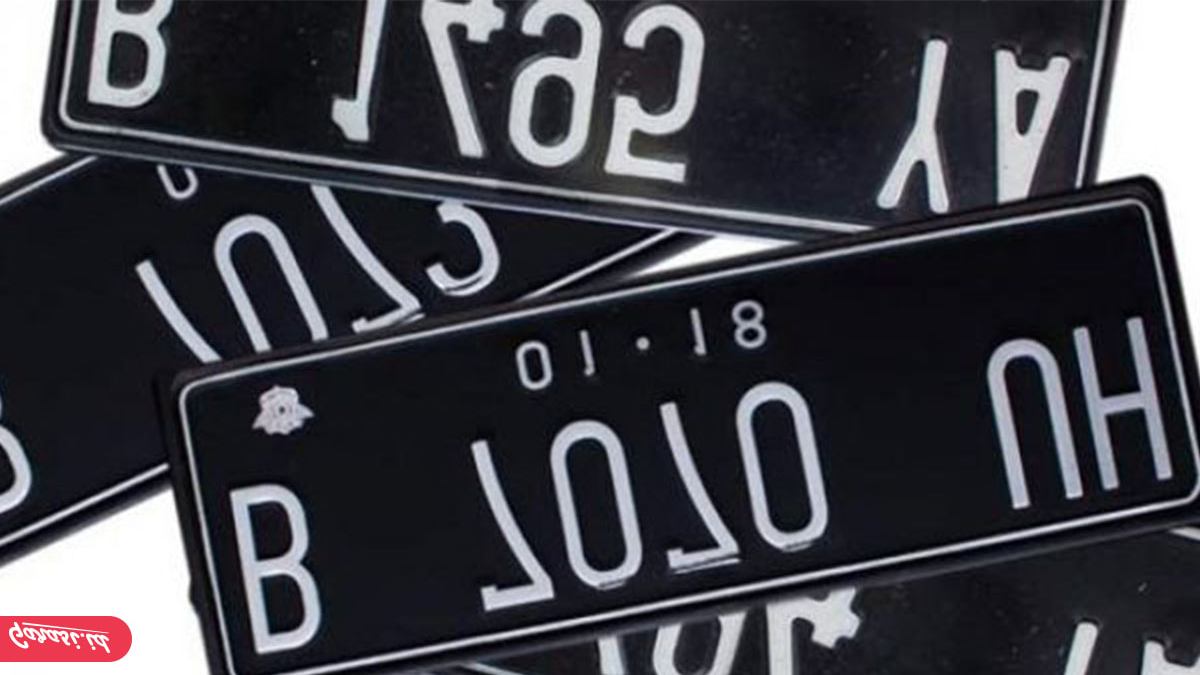

In [17]:
print("Hasil flip vertikal:")
cv2_imshow(flipped_vertical)


Hasil flip horizontal:


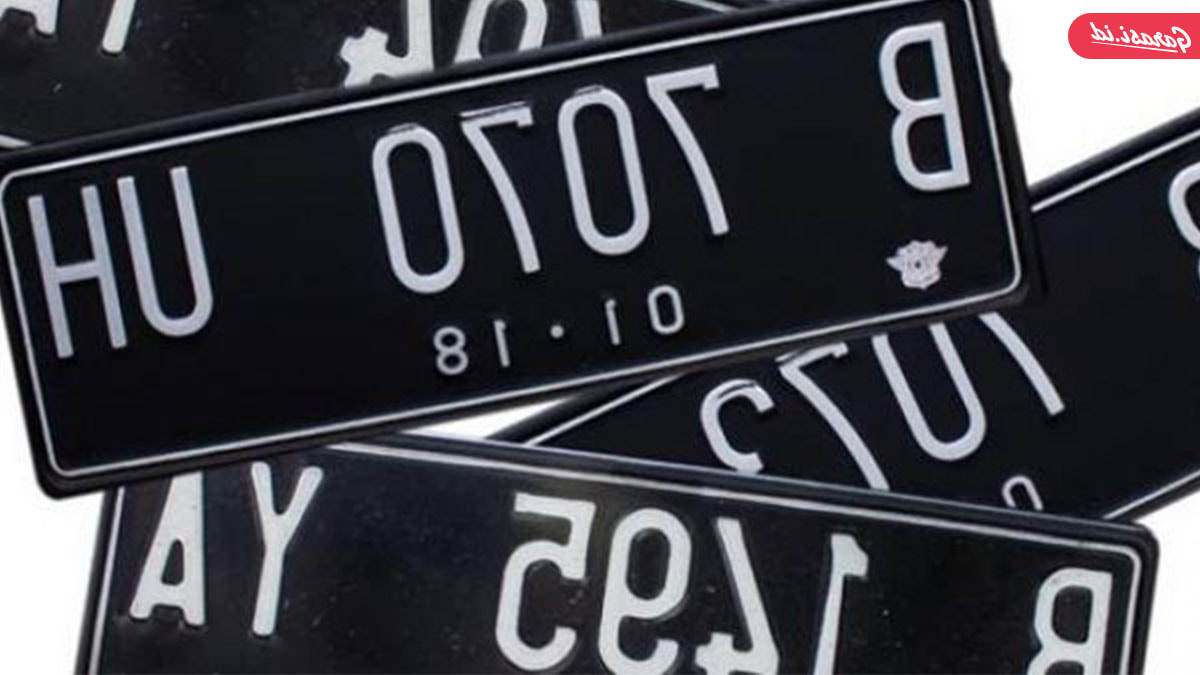

In [18]:
print("Hasil flip horizontal:")
cv2_imshow(flipped_horizontal)